In [1]:
import xarray as xr
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
############################
# set up 
############################
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRLradrefl_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRL3D_maxW.nc'

#
# v1p
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_maxW.nc'

#
# v2p0 and v2p2 and v2p3
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_maxW.nc'

#
# v2p1
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_maxW.nc'

#
# v3p0
#
#feature_data          = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_QR_2000m_AGL.nc'
#label_data            = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_W_2000m_AGL.nc'

#
# v4p0 - 5p0
#
feature_data          = '/glade/work/hardt/ds612/2000-2013_June-Sept_QRAIN_INTERP_AGL_0to7km_at_500m_steps.nc'
label_data            = '/glade/work/hardt/ds612/2000-2013_June-Sept_W_INTERP_AGL_0to7km_at_500m_steps.nc'

model_root      = '/glade/work/hardt/models'
model_run       = 'unet_v5p0'
predict_file    = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-5500m_2020_11_22_16_16.h5.nc'
job_number      = '1'

levels = {}
level_count = 1
for i in range(0,7500,500):
    label_name = str(i)
    levels[label_name] = level_count
    level_count = level_count + 1

level_label = '5500'
label_level = levels[level_label]

############################

In [3]:
fds = xr.open_dataset(feature_data)
lds = xr.open_dataset(label_data)

f1 = fds.QRAIN.values
num_images = f1.shape[0]
#
del f1
#
# Matching this data to the test data
# that went into the prediction
#
BATCH_SIZE = 32
data_fraction_for_test = 0.1
test_data_start = int(num_images * (1 - data_fraction_for_test))
test_data_start = (num_images - int((num_images - test_data_start) / BATCH_SIZE) * BATCH_SIZE) 
test_data_end = num_images
print ("Number of images:", num_images)
print ("Test data start image:", test_data_start)
print ("Test data end image:", test_data_end)
print ("Number of images used:", num_images - test_data_start)

#
# v1p0
#
#f = f[7648:9568,:,:]
#l = l[7648:9568,:,:]

#
# v2p0 and v2p2 and v2p3
#
#f = f[22306:27874,:,:]
#l = l[22306:27874,:,:]

#
# v2p1 - 95th percentile
# 
#f = f[9762:12250,:,:]
#l = l[9762:12250,:,:]

#
# v3p0 2000m QRAIN
#
#f = fds.refl.values
#l = lds.maxW.values
#l = lds.W.values

#f = f[test_data_start:test_data_end,:,:]
#l = l[test_data_start:test_data_end,:,:]

#
# v4p0 - v5p0
#

f = fds.QRAIN[test_data_start:test_data_end,:14,:,:].values.max(axis=1)
#l = lds.maxW.values
l = lds.W[test_data_start:test_data_end, label_level,:,:].values

#
# Matching this data to the test data
# that went into the prediction
#

BATCH_SIZE = 32
data_fraction_for_test = 0.1
test_data_start = int(num_images * (1 - data_fraction_for_test))
test_data_start = (num_images - int((num_images - test_data_start) / BATCH_SIZE) * BATCH_SIZE) 
test_data_end = num_images
print ("Number of images:", num_images)
print ("Test data start image:", test_data_start)
print ("Test data end image:", test_data_end)
print ("Number of images used:", num_images - test_data_start)


Number of images: 9568
Test data start image: 8640
Test data end image: 9568
Number of images used: 928
Number of images: 9568
Test data start image: 8640
Test data end image: 9568
Number of images used: 928


In [4]:
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-2000m_2020_10_16_12_31.h5.nc'
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-3000m_2020_10_16_17_48.h5.nc'
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-4000m_2020_10_16_18_41.h5.nc'
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-5000m_2020_10_17_00_25.h5.nc'
#predict_file    = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-5500m_2020_10_17_00_44.h5.nc'

#level_label = '5500'
#label_level = levels[level_label]

#f = fds.QRAIN.values
#f = f[test_data_start:test_data_end,label_level,:,:]
#f = np.max(f[test_data_start:test_data_end,:14,:,:], axis=1)

#l = lds.W.values
#l = l[test_data_start:test_data_end,label_level,:,:]

model_run_dir = os.path.join(model_root, model_run)
predict_data = os.path.join(model_run_dir, predict_file)

pds = xr.open_dataset(predict_data)
p = pds.pW.values

In [5]:
print(p.shape)
print(f.shape)
print(l.shape)

(928, 256, 256, 1)
(928, 256, 256)
(928, 256, 256)


In [6]:
#
# set up lat lon arrays
#
ds = xr.open_mfdataset('/glade/collections/rda/data/ds612.0/CTRLradrefl/REFL/wrf2d_d01_CTRL_REFL_10CM_200704-200706.nc', combine="nested", concat_dim='Time')
lat = ds.XLAT[350:350+256,650:650+256].values
lon = ds.XLONG[350:350+256,650:650+256].values

In [151]:
# 6-10, 50-51, 154, 507, 511, 500 (30???)
#
# v6p1 scaling
#
# 'refl_scaling_min': -35.0,
# 'refl_scaling_per99.99': 58.4954728,
# 'W_scaling_min': -14.297869,
# 'W_scaling_per99.99': 1.31273185,
#
# v6p2 scaling
#
# 'refl_scaling_min': -35.0,
# 'refl_scaling_per99.99': 58.4732837,
# 'W_scaling_min': -14.297869,
# 'W_scaling_per99.99': 1.31273185,

lmax = 1.31273185
lmin = -14.297869

plt_number = 134
fi = f[plt_number,:,:]
li = l[plt_number,:,:]
pi = p[plt_number,:,:,0]

#li = li * (lmax - lmin) + lmin
#pi = pi * (lmax - lmin) + lmin

In [152]:
print(pi.shape)
print(np.amin(li[:,:]))
print(np.amax(li[:,:]))
print(np.amin(pi[:,:]))
print(np.amax(pi[:,:]))

(256, 256)
0.0
1.0
-0.011889178
0.74263144


0.0 1.0 0.27104413509368896 0.5839623716473621
-0.011889178
0.74263144
0.31118430495262145


<Figure size 432x288 with 0 Axes>

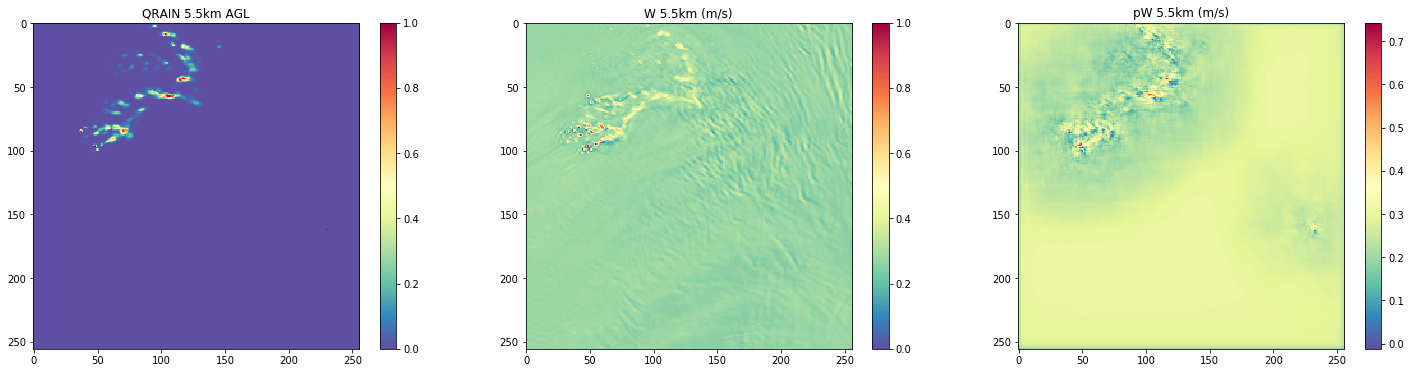

In [153]:
cmap = plt.cm.Spectral_r
plt.clf()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,6)) 

max_ref = np.amax(fi[:,:])
p_ref = np.percentile(fi[:,:], 99.9)

ref = ax1.imshow(fi, cmap=cmap)
#ax1.set_title("max QRAIN 0-6.5km AGL")
ax1.set_title("QRAIN 5.5km AGL")
#ref.set_clim(vmin=0, vmax=max_ref)
ref.set_clim()
fig.colorbar(ref, ax=ax1, orientation='vertical', label='')

max_maxW = np.amax(li[:,:])
min_maxW = np.amin(li[:,:])
p_maxW = np.percentile(li[:,:], 99.9)
pmin_maxW = np.percentile(li[:,:], 35.0)
print(min_maxW, max_maxW, pmin_maxW, p_maxW)

maxW = ax2.imshow(li, cmap=cmap)
ax2.set_title("W 5.5km (m/s)")
#maxW.set_clim(vmin=0, vmax=p_maxW)
maxW.set_clim()
fig.colorbar(maxW, ax=ax2)

min_pMaxW = np.amin(pi[:,:])
max_pMaxW = np.amax(pi[:,:])
p_pMaxW = np.percentile(pi[:,:], 99)
print(min_pMaxW)
print(max_pMaxW)
print(p_pMaxW)

pMaxW = ax3.imshow(pi, cmap=cmap)
ax3.set_title("pW 5.5km (m/s)")
#pMaxW.set_clim(vmin=0, vmax=1)
pMaxW.set_clim()
fig.colorbar(pMaxW, ax=ax3)

#plt.savefig(model_run_dir + "/predict_comp_" + job_number + "_" + str(plt_number) + ".png")

In [154]:
#
# changes to the colormap
#
from matplotlib.colors import ListedColormap

cmap = plt.cm.get_cmap('Spectral_r', 256)
newcolors = cmap(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
lt_gray = np.array([240/256, 240/256, 240/256, 1])
newcolors[:1, :] = lt_gray
mycmap = ListedColormap(newcolors)
#print(newcmap(range(12)))
#print('newcmap(np.linspace(0, 1, 12))', newcmp(np.linspace(0, 1, 12)))

Writing image to output file /glade/work/hardt/models/unet_v5p0/predict-unet_v5p0--image134.png



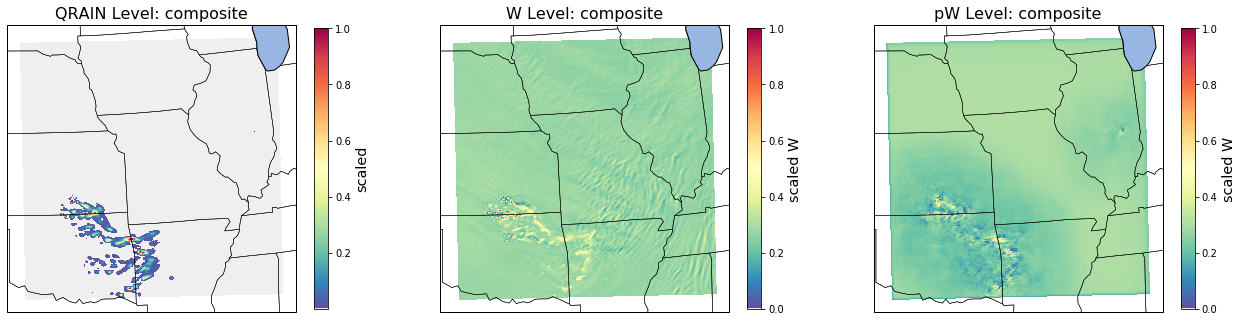

In [155]:
import cartopy.crs as ccrs
import cartopy.feature as cf

composite_refl = True
composite_W = True

#
# images with geo-referencing
#

def plot_background(ax):
    #ax.set_extent([235., 290., 20., 55.])
    #ax.set_extent([-102, -85, 30, 45])
    ax.add_feature(cf.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cf.STATES, linewidth=0.5)
    ax.add_feature(cf.BORDERS, linewidth=0.5)
    ax.add_feature(cf.OCEAN)
    ax.add_feature(cf.LAKES, edgecolor='black')
    ax.add_feature(cf.LAND, facecolor='white', edgecolor='none')
    #ax.add_feature(cf.LAND, facecolor='wheat', edgecolor='none')

    return ax

#
# set up plot
#
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
#
#cmap = plt.cm.Spectral_r
cmap=mycmap
#
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(22, 6), subplot_kw={'projection': crs})
#fig.suptitle(full_datetime_string + '\nimage #' + str(plt_number))
#
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)
#
# fi (feature image)
#
if composite_refl:
    cf1 = axlist[0].pcolormesh(lon, lat, fi, cmap=cmap, transform = ccrs.PlateCarree())
    axlist[0].set_title('QRAIN Level: composite', fontsize=16)
else:
    cf1 = axlist[0].pcolormesh(lon, lat, fi, cmap=cmap, transform = ccrs.PlateCarree())
    axlist[0].set_title('QRAIN Level: ' + str(refl_height+1) + ' of 10', fontsize=16)
#
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.86, pad=0.05)#, cmap=cmap)#, norm=norm, ticks=bounds)
cb1.mappable.set_clim(0.001,1)
cb1.set_label('scaled', size='x-large')
#
# Plotting li (label image)
#
cf2 = axlist[1].pcolormesh(lon, lat, li, cmap=cmap, transform = ccrs.PlateCarree())
if composite_W:
    axlist[1].set_title('W Level: composite', fontsize=16)
else:
    axlist[1].set_title('W Level: ' + str(W_height+1) + ' of 51', fontsize=16)
#
cb2 = fig.colorbar(cf2, ax=axlist[1], orientation='vertical', shrink=0.86, pad=0.05, 
                   cmap=cmap)#, norm=norm, ticks=bounds, extend='both', boundaries=[-10] + bounds + [10], spacing='uniform', extendfrac='auto')
cb2.mappable.set_clim(0,1)
cb2.set_label('scaled W', size='x-large')
#
# Plotting pi (predicted image)
#
cf3 = axlist[2].pcolormesh(lon, lat, pi, cmap=cmap, transform = ccrs.PlateCarree())
if composite_W:
    axlist[2].set_title('pW Level: composite', fontsize=16)
else:
    axlist[2].set_title('pW Level: ' + str(W_height+1) + ' of 51', fontsize=16)
#
cb3 = fig.colorbar(cf3, ax=axlist[2], orientation='vertical', shrink=0.86, pad=0.05, 
                   cmap=cmap)#, norm=norm, ticks=bounds, extend='both', boundaries=[-10] + bounds + [10], spacing='uniform', extendfrac='auto')
cb3.mappable.set_clim(0,1)
cb3.set_label('scaled W', size='x-large')

output_filename = 'predict-' + model_run + '-'# + yearMonthDay
output_filename = output_filename + '-image' + str(plt_number) + '.png'
of = os.path.join(model_run_dir, output_filename)
#
# Write output file
#
print('Writing image to output file', of)
print()
plt.savefig(of)